
Random Forest Accuracy: 0.973816717019134
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       353
         2.0       0.94      0.99      0.96       317
         3.0       0.99      0.99      0.99       323

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993


Decision Tree Accuracy: 0.9436052366565961
              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93       353
         2.0       0.91      0.93      0.92       317
         3.0       0.98      0.98      0.98       323

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993


Logistic Regression Accuracy: 0.8630412890231621
              precision    recall  f1-score   support

         1.0       0.94      0.86      0.90   

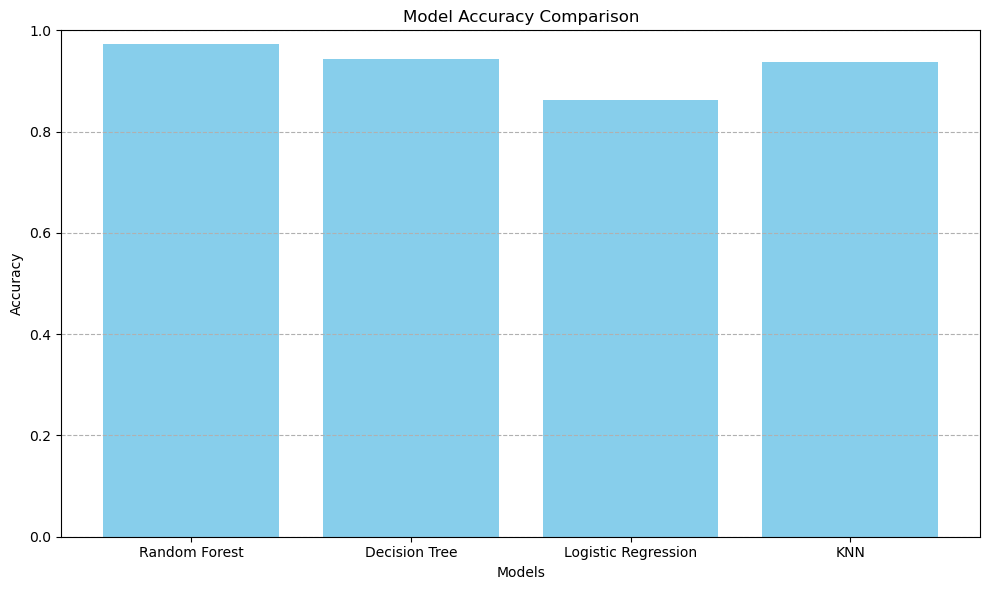

In [1]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# 📥 Load Dataset
df = pd.read_csv("fetal_health.csv")

# 🧹 Step 1: Handle Missing Values
df.dropna(inplace=True)

# 🧪 Step 2: Feature and Target Separation
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# ⚖ Step 3: Balance Dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 🧪 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 📏 Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 💾 Save scaler for future use
joblib.dump(scaler, "scaler.pkl")

# 🧠 Step 6: Train Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

# 📊 Step 7: Train & Evaluate Models
best_model = None
best_accuracy = 0
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

# 💾 Step 8: Save the best model
joblib.dump(best_model, "model.pkl")
print(f"\n✅ Best Model Saved: {type(best_model).__name__} with Accuracy: {best_accuracy:.2f}")

# 📈 Step 9: Plot Accuracy Comparison
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()


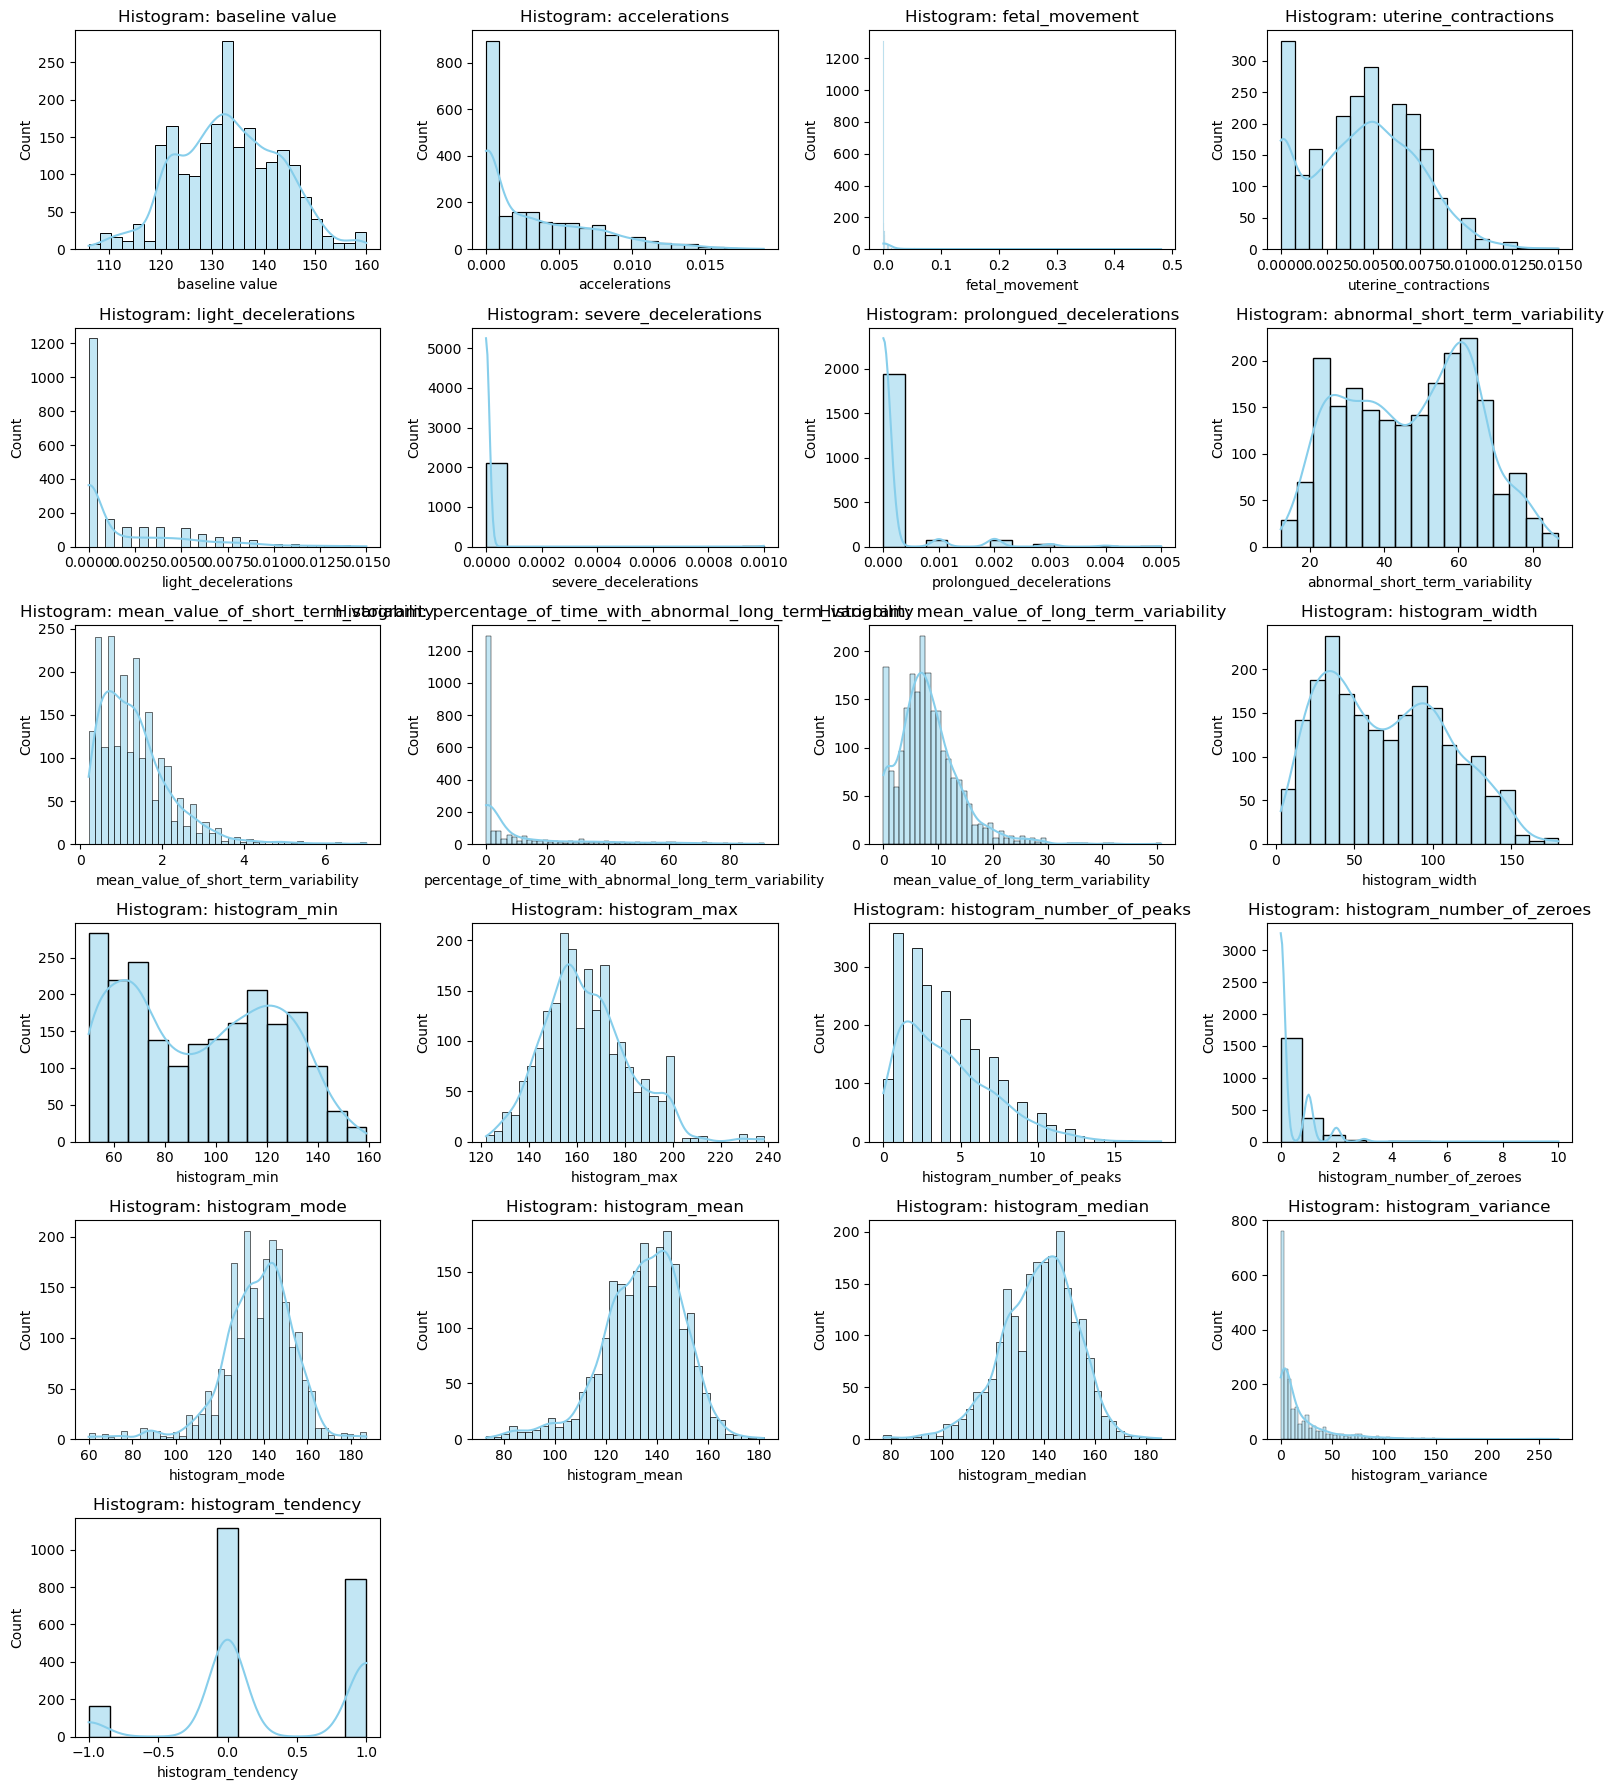

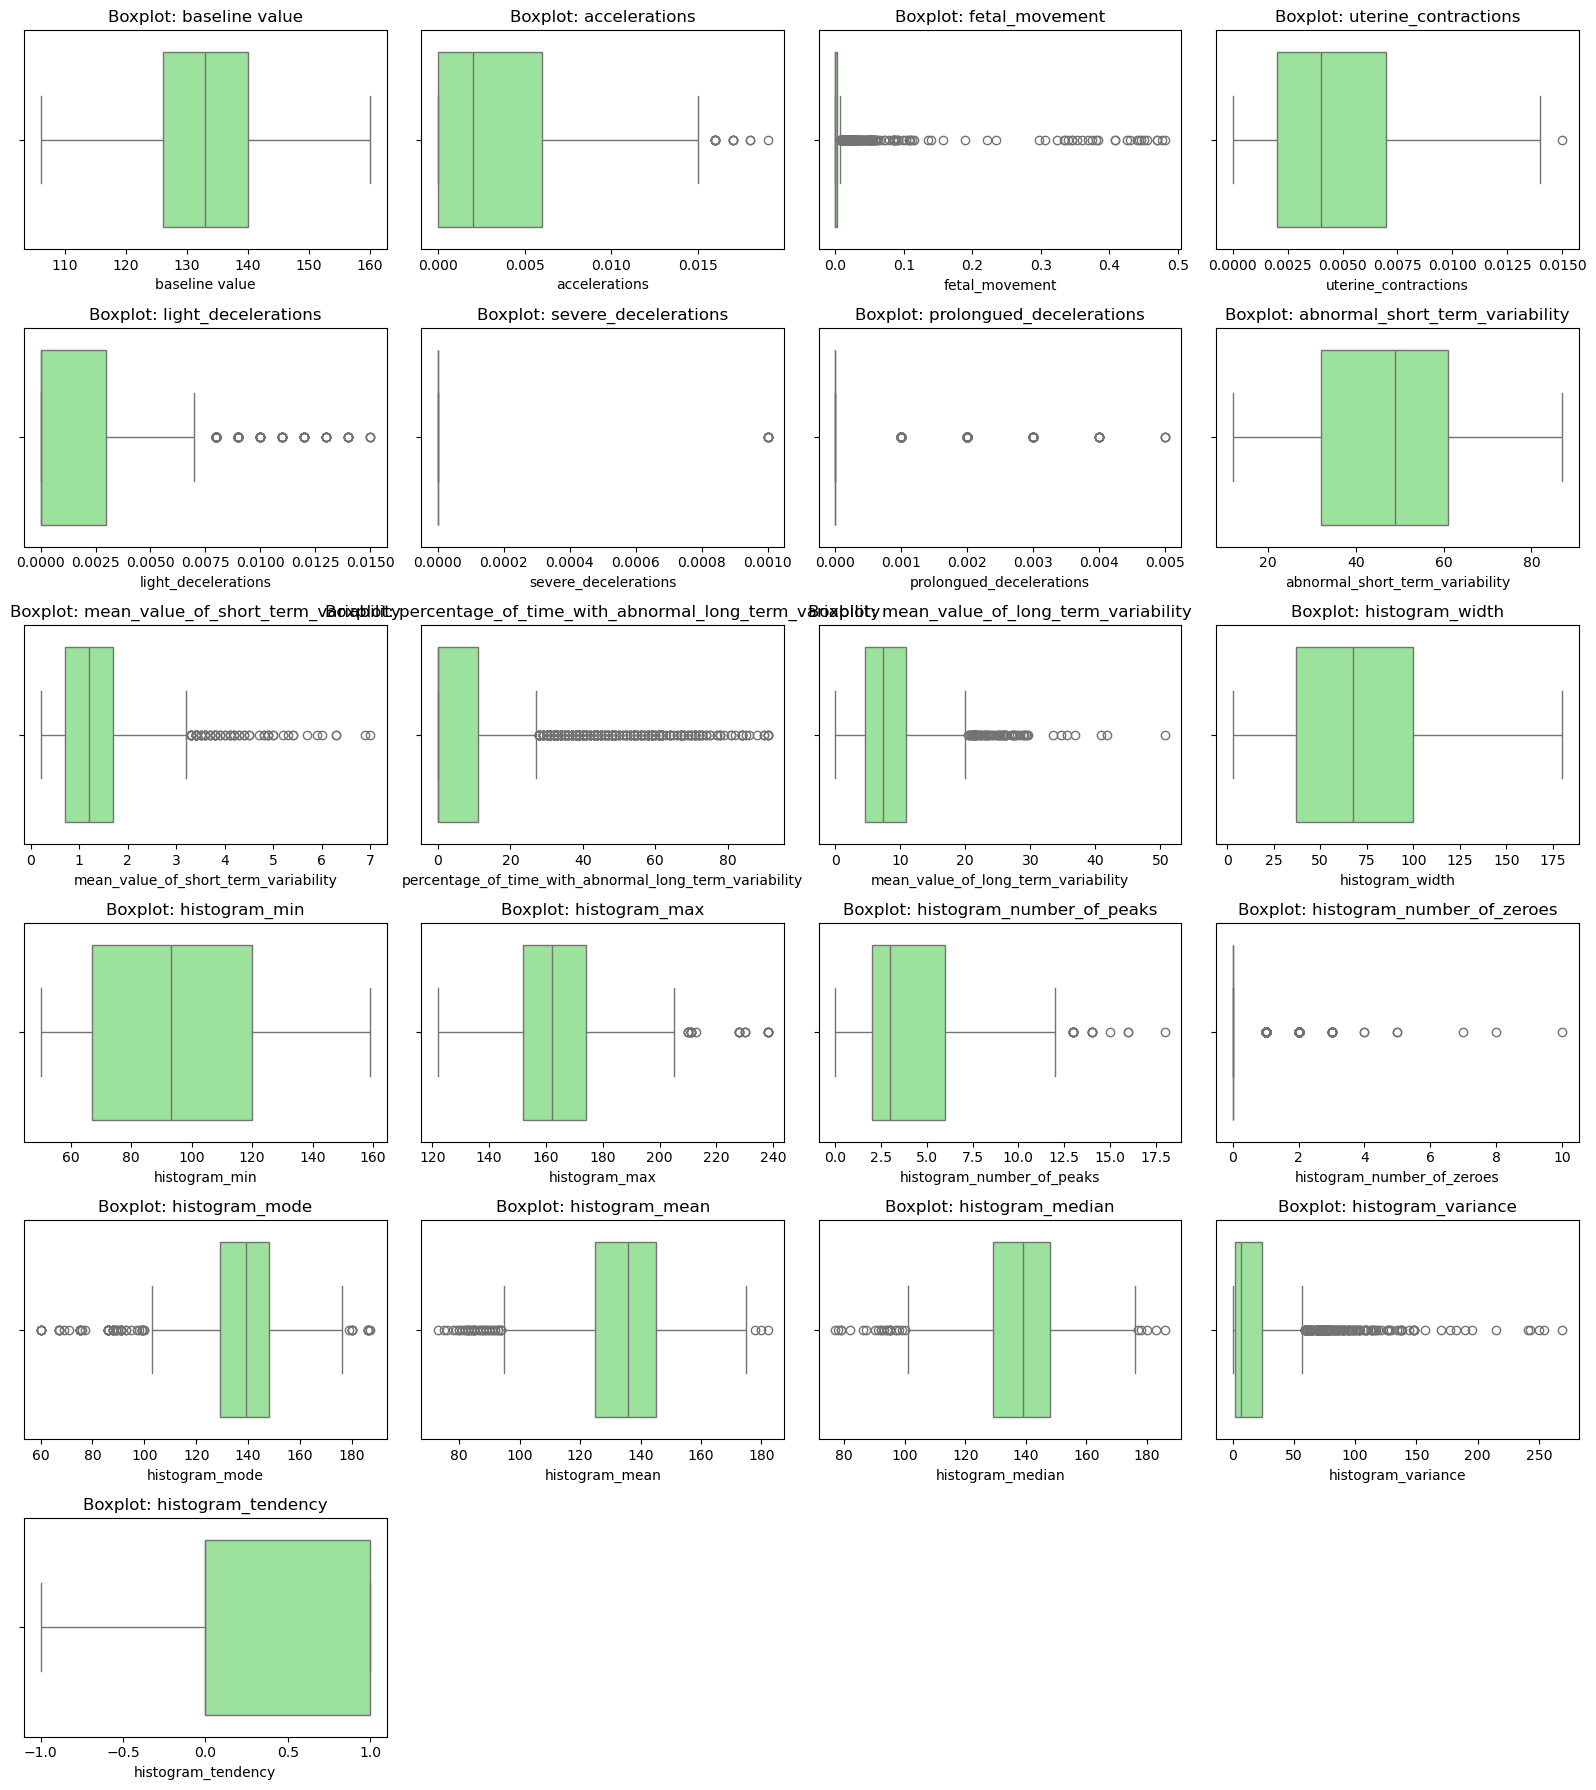

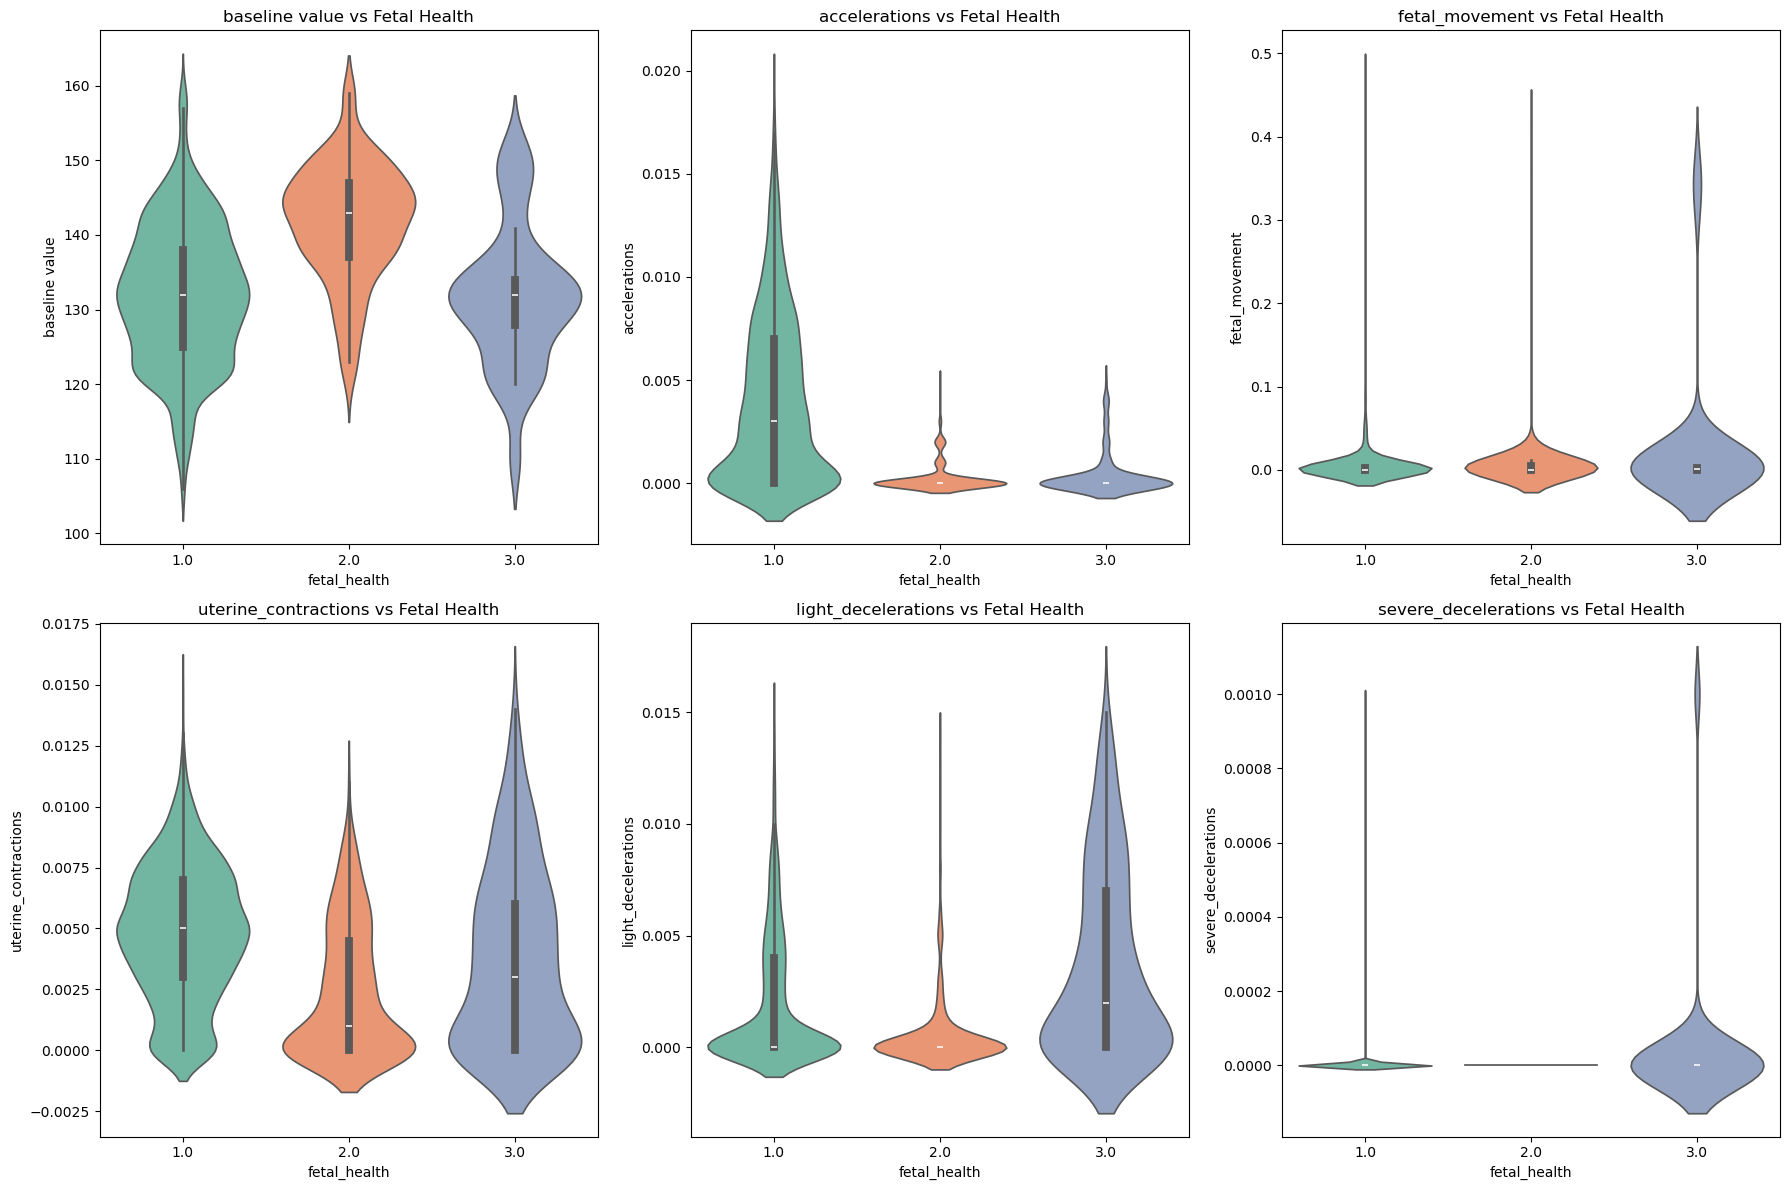

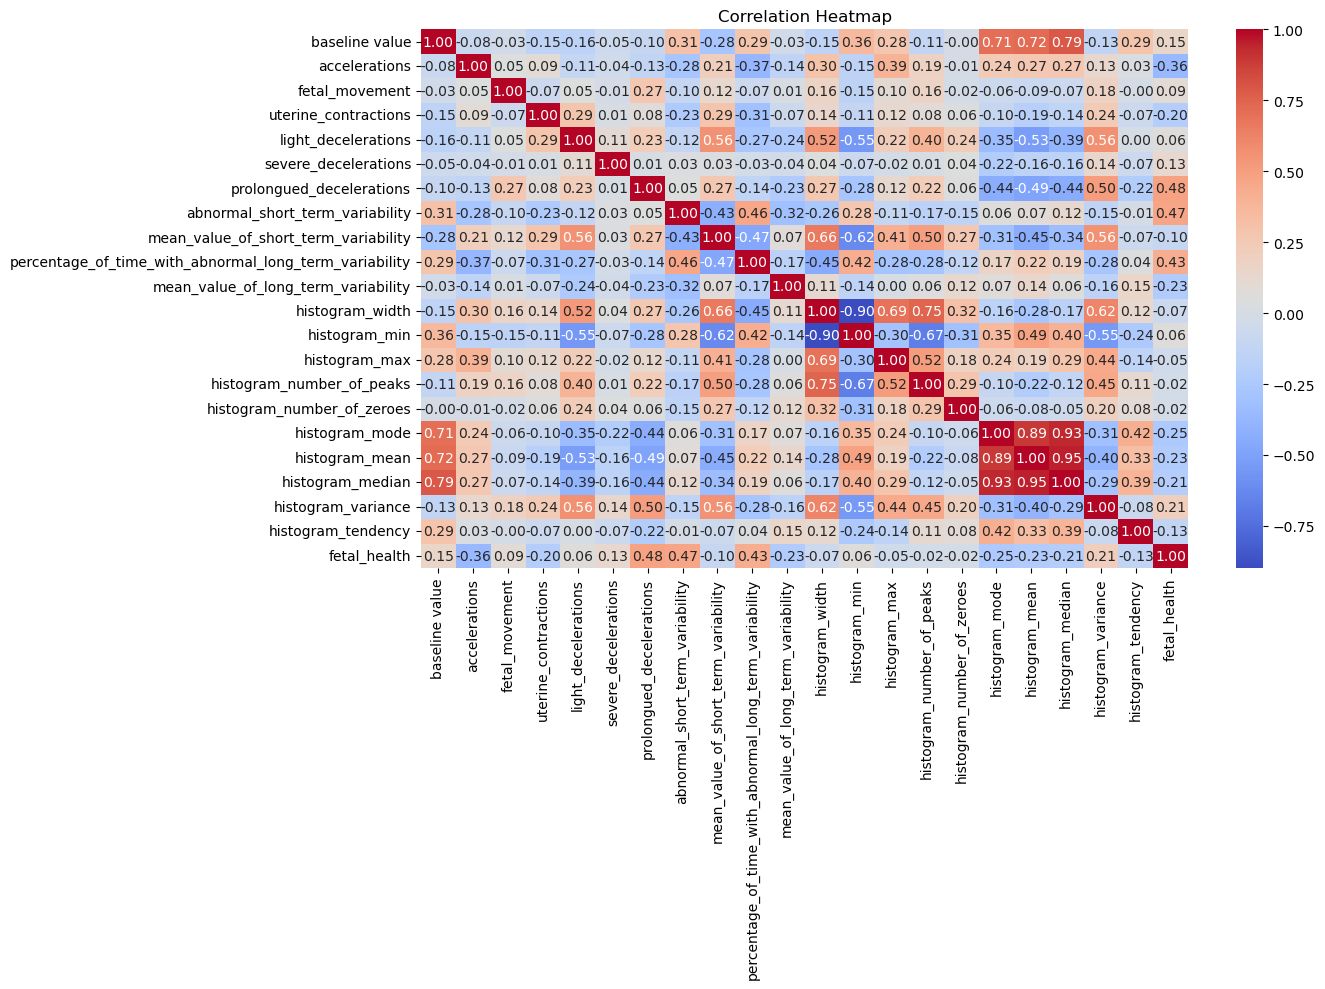

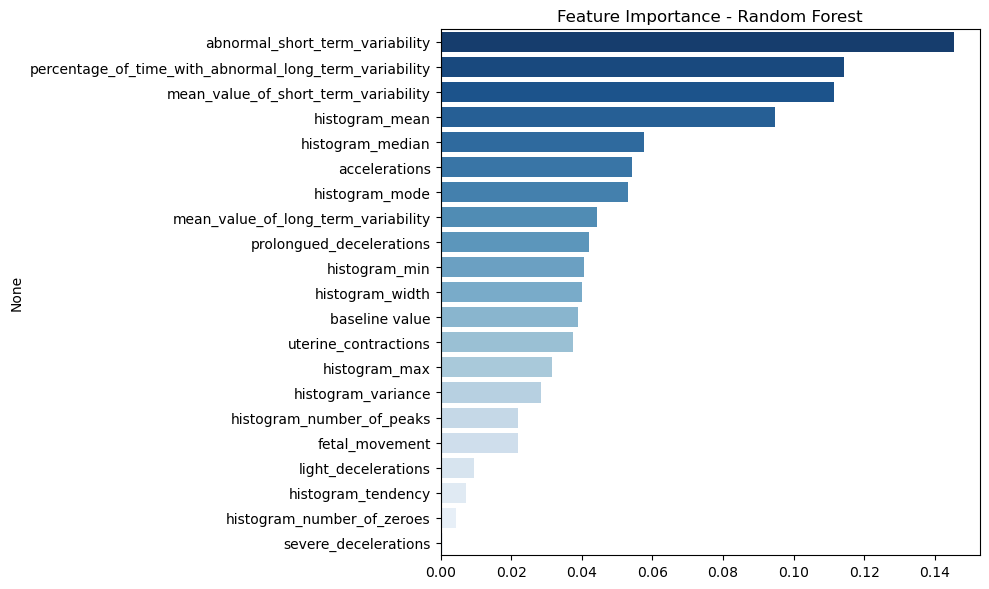

✅ Visual analysis complete.
Original class distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Balanced class distribution after SMOTE:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64


In [4]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import os
import warnings
warnings.filterwarnings("ignore")

# 📥 Load Dataset
df = pd.read_csv("fetal_health.csv")
df.dropna(inplace=True)

# 🎯 Define Features & Target
target = "fetal_health"
features = df.drop(target, axis=1).columns

# 📁 Create Output Folder
os.makedirs("outputs", exist_ok=True)

# ===============================
# 1️⃣ Univariate Analysis
# ===============================

n_features = len(features)
cols = 4
rows = math.ceil(n_features / cols)

# Histogram
plt.figure(figsize=(cols * 4, rows * 3))
for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.savefig("outputs/univariate_histograms.png")
plt.show()

# Boxplot
plt.figure(figsize=(cols * 4, rows * 3))
for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.savefig("outputs/univariate_boxplots.png")
plt.show()

# ===============================
# 2️⃣ Bivariate Analysis
# ===============================

# Violin plots (first 6 features)
plt.figure(figsize=(18, 12))
for i, col in enumerate(features[:6]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(x=target, y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Fetal Health")
plt.tight_layout()
plt.savefig("outputs/bivariate_violinplots.png")
plt.show()

# ===============================
# 3️⃣ Multivariate Analysis (Correlation Heatmap)
# ===============================

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_matrix.png")
plt.show()

# ===============================
# 4️⃣ Feature Importance (Random Forest)
# ===============================

X = df.drop(target, axis=1)
y = df[target]

model = RandomForestClassifier()
model.fit(X, y)

importance = model.feature_importances_
feat_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="Blues_r")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("outputs/feature_importance.png")
plt.show()

# ===============================
# 5️⃣ Train-Test Split and Scaling
# ===============================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 6️⃣ Apply SMOTE for Balancing
# ===============================

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# ✅ Summary Output
print("✅ Visual analysis complete.")
print(f"Original class distribution:\n{y.value_counts()}")
print(f"Balanced class distribution after SMOTE:\n{pd.Series(y_train_bal).value_counts()}")


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

# 📂 Load Dataset
df = pd.read_csv("fetal_health.csv")

# ✅ Corrected Feature List
features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'histogram_mean']
X = df[features]
y = df['fetal_health']

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 📏 Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 🧠 Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)

# 💾 Save Model and Scaler
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and Scaler Saved Successfully")


✅ Model and Scaler Saved Successfully


In [10]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({1.0: 1322, 2.0: 231, 3.0: 147})
After SMOTE: Counter({1.0: 1322, 2.0: 1322, 3.0: 1322})


In [11]:
from sklearn.metrics import classification_report

# After predicting on test
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93       333
         2.0       0.66      0.69      0.67        64
         3.0       0.66      0.86      0.75        29

    accuracy                           0.88       426
   macro avg       0.75      0.82      0.78       426
weighted avg       0.89      0.88      0.88       426



In [12]:
features = [
    'baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
    'light_decelerations', 'severe_decelerations', 'prolonged_decelerations',
    'abnormal_short_term_variability', 'histogram_mean', 'histogram_width',
    'histogram_median'
]


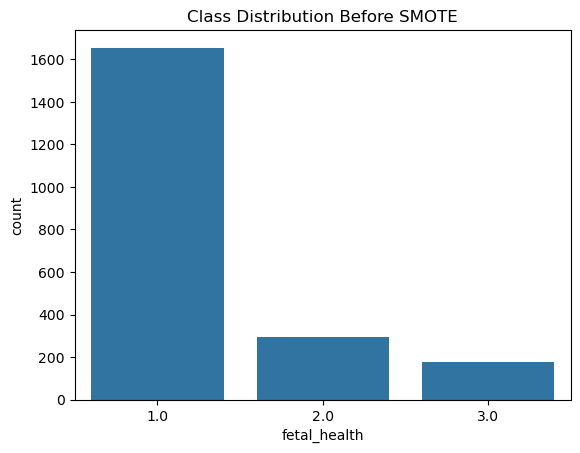

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fetal_health', data=df)
plt.title("Class Distribution Before SMOTE")
plt.show()


In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", f1)


Macro F1 Score: 0.7835820314818279


In [15]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

# Feature list used during training
features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'histogram_mean']

# Class label mapping
class_map = {1.0: "Normal", 2.0: "Suspect", 3.0: "Pathological"}

# Excel file for logging
excel_path = "results.xlsx"

# Load or create results DataFrame
try:
    results_df = pd.read_excel(excel_path)
except FileNotFoundError:
    results_df = pd.DataFrame(columns=features + ['Prediction', 'Timestamp'])

# Prediction function
def predict_fetal_health(baseline, acc, movement, contractions, hist_mean):
    input_data = np.array([[baseline, acc, movement, contractions, hist_mean]])
    scaled_input = scaler.transform(input_data)

    pred_class = model.predict(scaled_input)[0]
    pred_proba = model.predict_proba(scaled_input)[0]
    label = class_map.get(pred_class, "Unknown")

    # Prepare result
    probs_text = "\n".join([f"{class_map.get(cls)}: {prob:.2%}" for cls, prob in zip(model.classes_, pred_proba)])

    # Save to results
    global results_df
    new_row = {
        'baseline value': baseline,
        'accelerations': acc,
        'fetal_movement': movement,
        'uterine_contractions': contractions,
        'histogram_mean': hist_mean,
        'Prediction': label,
        'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    results_df.to_excel(excel_path, index=False)

    # Show last 10 predictions in GUI
    display_df = results_df.tail(10).reset_index(drop=True)

    return label, probs_text, display_df

# Gradio interface
inputs = [
    gr.Number(label="Baseline Value"),
    gr.Number(label="Accelerations"),
    gr.Number(label="Fetal Movement"),
    gr.Number(label="Uterine Contractions"),
    gr.Number(label="Histogram Mean"),
]

outputs = [
    gr.Textbox(label="Predicted Fetal Health"),
    gr.Textbox(label="Prediction Probabilities"),
    gr.Dataframe(label="Recent Prediction Log (Last 10)", interactive=False),
]

app = gr.Interface(
    fn=predict_fetal_health,
    inputs=inputs,
    outputs=outputs,
    title="Fetal Health Prediction App",
    description="This app predicts fetal health condition based on input values and shows prediction history. Results are saved in an Excel file.",
    theme="default"
)

if __name__ == "__main__":
    app.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [17]:
# train_model.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

# Load dataset
df = pd.read_csv("fetal_health.csv")

# Split features and target
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE()
X_bal, y_bal = smote.fit_resample(X_scaled, y)

# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model and scaler
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       353
         2.0       0.93      0.98      0.96       317
         3.0       0.98      0.99      0.99       323

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993

Accuracy: 0.9687814702920443


['scaler.pkl']

In [18]:
# gradio_app.py

import gradio as gr
import pandas as pd
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

label_map = {1: "Normal", 2: "Suspect", 3: "Pathological"}

def predict_from_csv(file):
    # Load and preprocess
    df = pd.read_csv(file.name)
    if "fetal_health" in df.columns:
        X = df.drop("fetal_health", axis=1)
    else:
        X = df

    X_scaled = scaler.transform(X)
    predictions = model.predict(X_scaled)
    df["Prediction"] = [label_map.get(p, "Unknown") for p in predictions]

    return df

# Gradio Interface
demo = gr.Interface(
    fn=predict_from_csv,
    inputs=gr.File(label="Upload CSV File"),
    outputs=gr.Dataframe(),
    title="🧠 Fetal Health Classifier",
    description="Upload a CSV file with features to predict fetal health (Normal, Suspect, Pathological)."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
